<a href="https://colab.research.google.com/github/TurMod/Data-Science-HW/blob/main/Hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, F1Score

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),

    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy", Precision(), Recall(), F1Score()]
)

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_23 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_27 (Dropout)        (None, 1600)            

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test),
)

Epoch 1/20
469/469 [==============================] - 51s 105ms/step - loss: 0.5931 - accuracy: 0.7819 - precision_21: 0.8619 - recall_21: 0.7096 - f1_score: 0.7791 - val_loss: 0.4073 - val_accuracy: 0.8562 - val_precision_21: 0.8955 - val_recall_21: 0.8140 - val_f1_score: 0.8549
Epoch 2/20
469/469 [==============================] - 60s 129ms/step - loss: 0.4005 - accuracy: 0.8556 - precision_21: 0.8874 - recall_21: 0.8220 - f1_score: 0.8547 - val_loss: 0.3506 - val_accuracy: 0.8762 - val_precision_21: 0.9047 - val_recall_21: 0.8471 - val_f1_score: 0.8752
Epoch 3/20
469/469 [==============================] - 49s 104ms/step - loss: 0.3487 - accuracy: 0.8732 - precision_21: 0.8984 - recall_21: 0.8486 - f1_score: 0.8725 - val_loss: 0.3266 - val_accuracy: 0.8832 - val_precision_21: 0.9079 - val_recall_21: 0.8577 - val_f1_score: 0.8836
Epoch 4/20
469/469 [==============================] - 49s 104ms/step - loss: 0.3225 - accuracy: 0.8826 - precision_21: 0.9046 - recall_21: 0.8615 - f1_score:

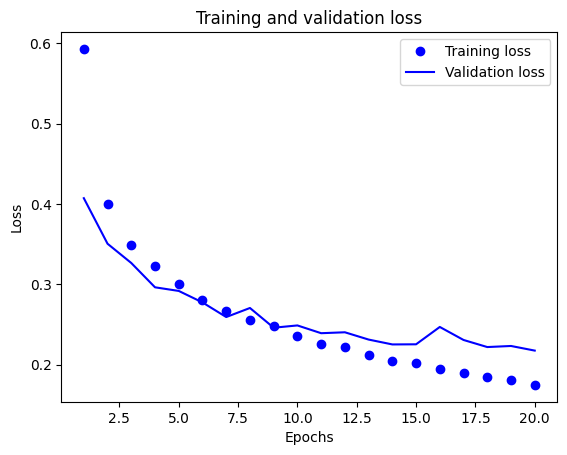

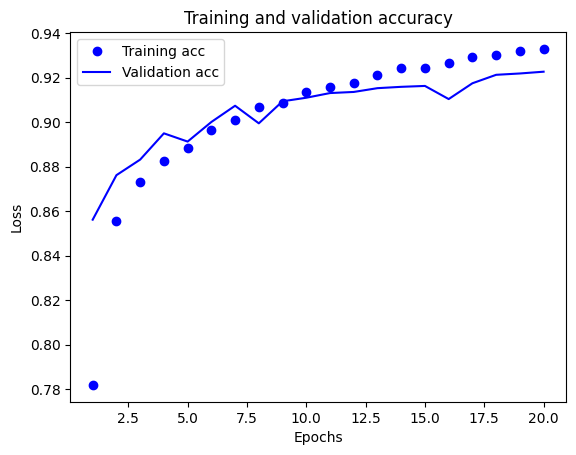

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 3s 8ms/step - loss: 0.2176 - accuracy: 0.9227 - precision_21: 0.9327 - recall_21: 0.9140 - f1_score: 0.9221
[0.21763452887535095, 0.9226999878883362, 0.9327482581138611, 0.9139999747276306, array([0.87609756, 0.9879397 , 0.8798449 , 0.9282153 , 0.87963885,
       0.98502994, 0.768254  , 0.964163  , 0.98502994, 0.9668537 ],
      dtype=float32)]
